In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("new/ToyotaCorolla - MLR.csv")
print(df.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [5]:
print(df.describe())

              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.0

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 117.9+ KB
None


In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

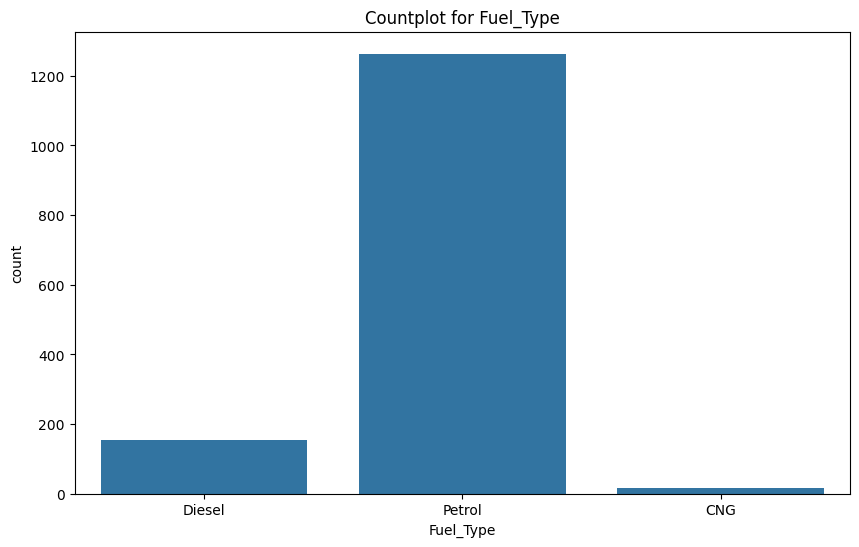

In [8]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in df[categorical_columns].columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Countplot for {column}")
    plt.show()

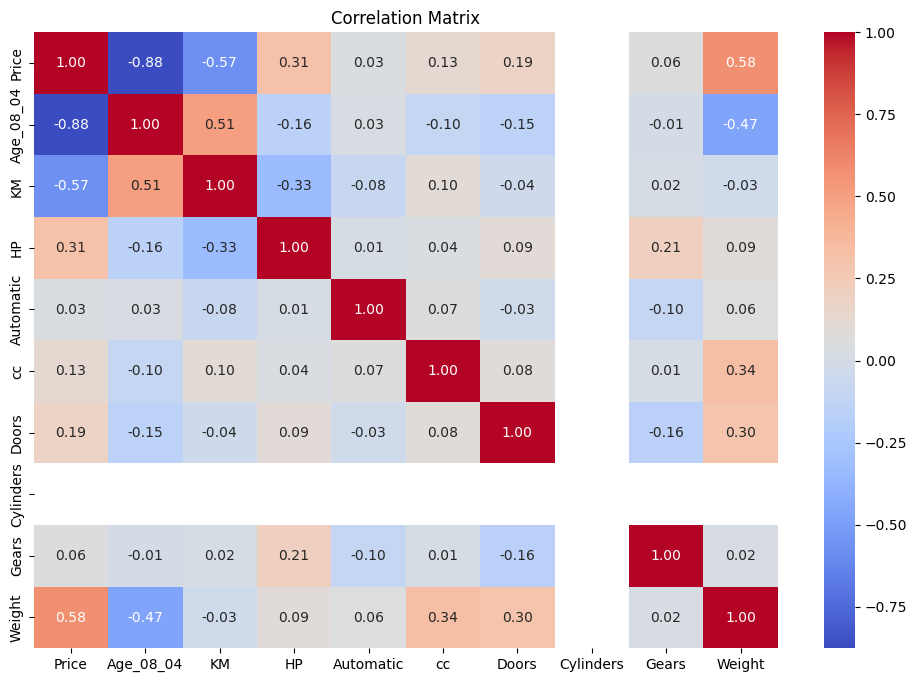

In [9]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

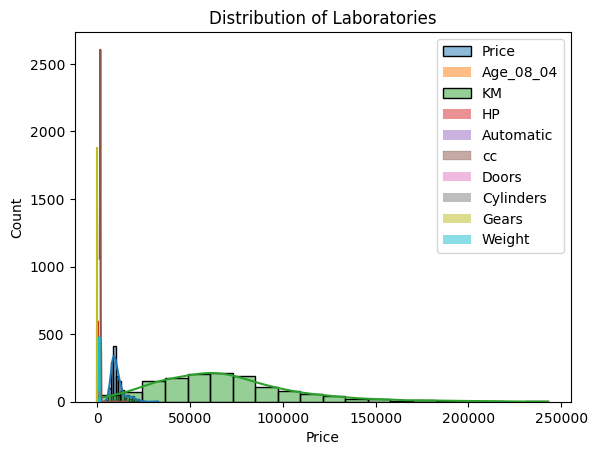

In [10]:
for column in df[numerical_columns].columns:
    sns.histplot(df[column], kde=True, bins=20, label=column)
plt.title('Distribution of Laboratories')
plt.legend()
plt.show()

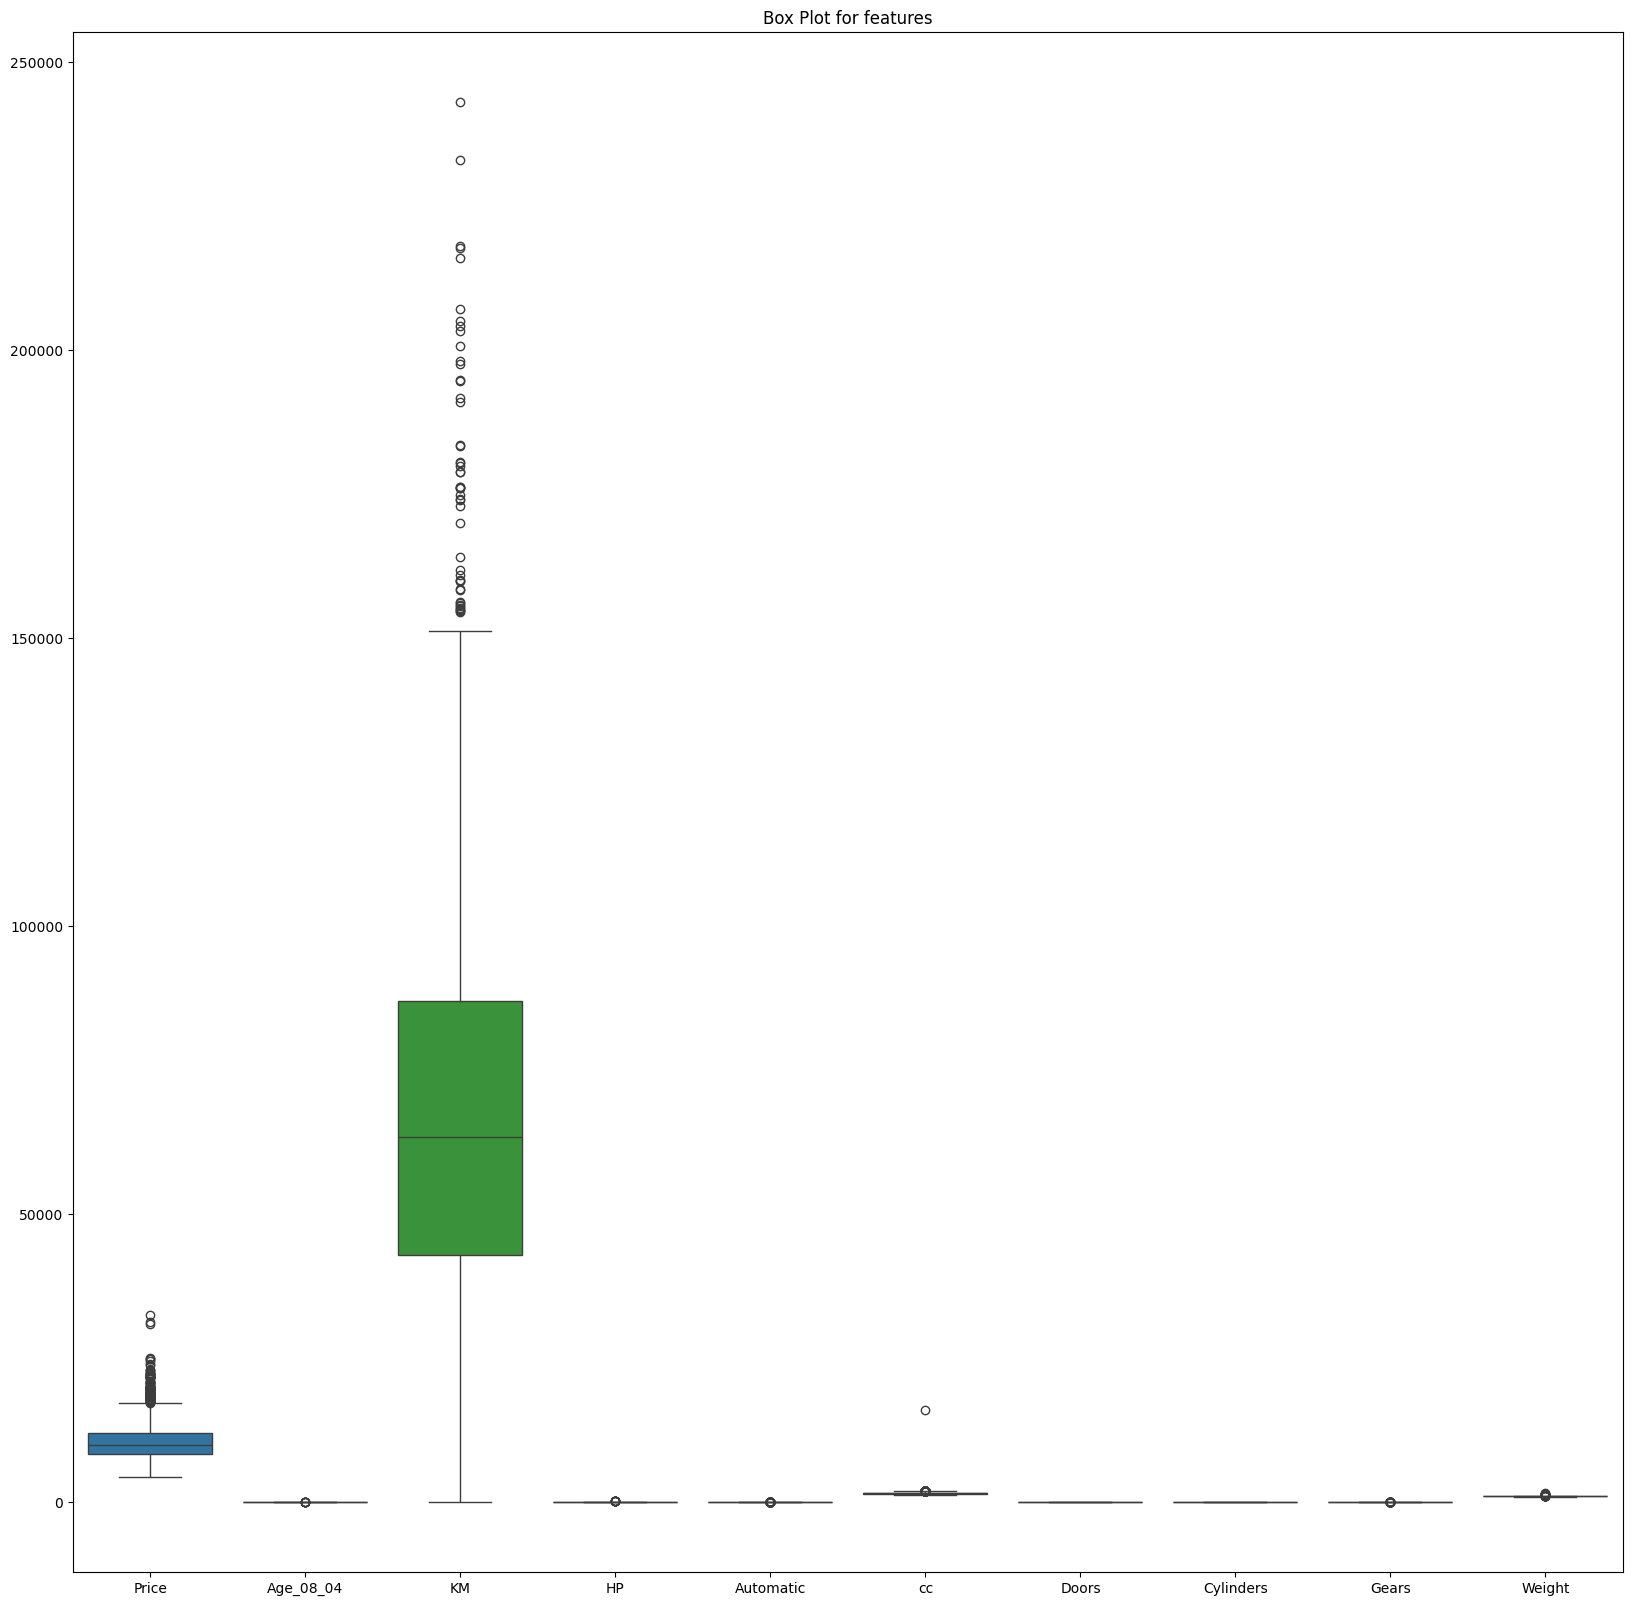

In [11]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot for features')
plt.show()

In [12]:
outlier_threshold = 1.5
for column in df[numerical_columns].columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    
    if not outliers.empty:
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].mean()

       
        print(f"Imputed outliers for {column} with mean:")
        print(outliers)
        print("\n")

Imputed outliers for Price with mean:
     Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
7    18600         30  75889    Diesel   90          0  2000      3   
8    21500         27  19700    Petrol  192          0  1800      3   
10   20950         25  31461    Petrol  192          0  1800      3   
11   19950         22  43610    Petrol  192          0  1800      3   
12   19600         25  32189    Petrol  192          0  1800      3   
..     ...        ...    ...       ...  ...        ...   ...    ...   
182  21125          2    225    Petrol   97          0  1400      5   
183  21500          2     15    Petrol  110          0  1600      5   
184  17795          1      1    Petrol   98          0  1400      4   
185  18245          1      1    Petrol  110          0  1600      5   
523  18950         49  49568    Petrol  110          0  1600      3   

     Cylinders  Gears  Weight  
7            4      5    1245  
8            4      5    1185  
10           

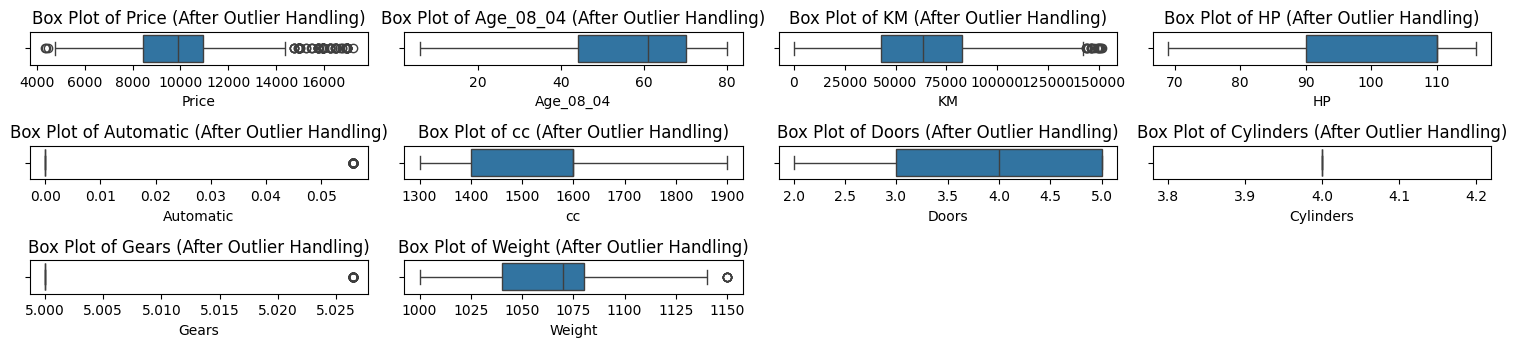

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(9, 4, i)
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col} (After Outlier Handling)')
plt.tight_layout()
plt.show()

In [15]:
Y = df[["Price"]]
X = df[["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Weight"]]
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_Y = SS.fit_transform(Y) 

training_errors = []
test_errors = []

for i in range(1, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(SS_X, SS_Y, test_size=0.30, random_state=i)
    LR = LinearRegression()
    LR.fit(X_train, Y_train)

    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)
    training_errors.append(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
    test_errors.append(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))

print("Average training error (RMSE):", np.mean(training_errors).round(3))
print("Average test error (RMSE):", np.mean(test_errors).round(3))

Average training error (RMSE): 0.661
Average test error (RMSE): 0.667


In [16]:
LR.fit(SS_X, SS_Y)
Y_pred = LR.predict(SS_X)


r2 = r2_score(SS_Y, Y_pred)
print("R square:", r2.round(3))

R square: 0.561


In [17]:
r2 = pd.DataFrame({'Model': range(1, 100), 'R-squared': r2})
print(r2)

    Model  R-squared
0       1   0.561125
1       2   0.561125
2       3   0.561125
3       4   0.561125
4       5   0.561125
..    ...        ...
94     95   0.561125
95     96   0.561125
96     97   0.561125
97     98   0.561125
98     99   0.561125

[99 rows x 2 columns]


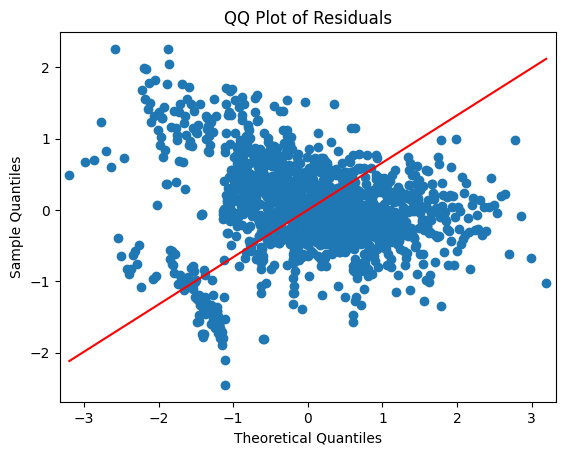

In [18]:
residuals = SS_Y - Y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

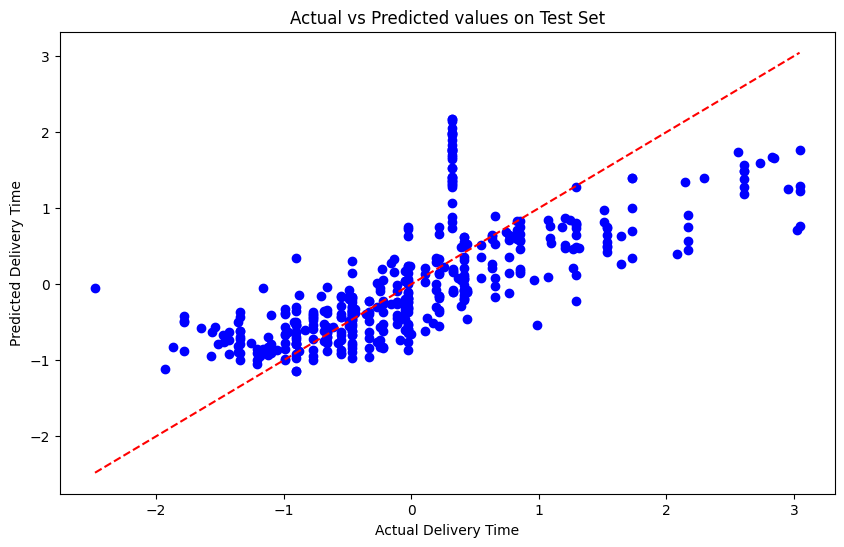

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_test, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted values on Test Set')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.show()

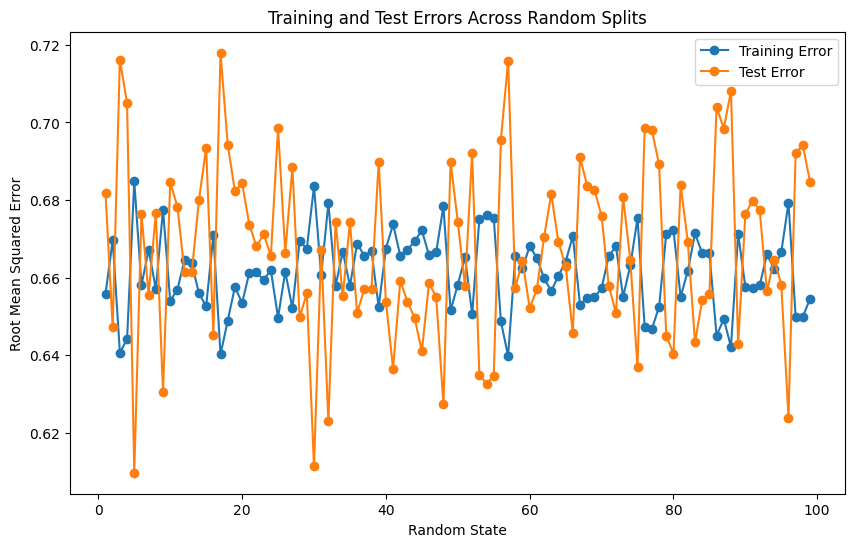

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), training_errors, label='Training Error', marker='o')
plt.plot(range(1, 100), test_errors, label='Test Error', marker='o')
plt.xlabel('Random State')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Errors Across Random Splits')
plt.legend()
plt.show()